In [1]:
from DP.pga_mutliple_restarts import PGAETMultipleRestarts
from DP.linear_solver import LinearSolver
from DP.DP_tester import DP_tester
from DP.utils import print_matrix, binom_optimal_privacy, fisher_information_privatized, reduce_optimal_matrix
import numpy as np

In [2]:
N = 3
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(PGAETMultipleRestarts(3), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.06930233896958769	0.06930243813318424	0.1883819398975379	0.18838638518503784
row 1: 0.1557151959060543	0.1557153612751832	0.42328116260008025	0.42327651795061505
row 2: 0.04392269070258167	0.04392277699626995	0.11939498551890972	0.11939519268774641
row 3: 0.7310597753781245	0.731059424146609	0.2689419115191447	0.26894190371801985
Converged after 11 iterations.
1.9219748473103018
row 0: 0.26894142136999516	0.26894142136999516	0.7310585786300049	0.7310585786300049
row 1: 0.7310585786300048	0.7310585786300048	0.2689414213699951	0.2689414213699951
1.921970403306652


In [3]:
N = 30
EPSILON = 1.0
THETA = 0.5

opt_q, status, history = binom_optimal_privacy(PGAETMultipleRestarts(1), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(fisher_information_privatized(opt_q, N, THETA))
print("==================")

#opt_q, _, _ = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
#print_matrix(opt_q)
#print(fisher_information_privatized(opt_q, N, THETA))

row 0: 0.04495725273167502	0.04494841199706463	0.044916345921766354	0.044718550457031596	0.043334046034069915	0.036586311695417935	0.016634554366196395	0.016634676318738145	0.01663458905834837	0.01663457794741836	0.016634566033361685	0.016634562511105715	0.016634758480786025	0.01663470748674623	0.016634564202998053	0.016635074700258493	0.04521501781592033	0.04521543592963759	0.04521504303691249	0.045215421048211864	0.045215433108741106	0.04521543627028854	0.04521528301130021	0.04521563227665593	0.04521566156660426	0.045221980659156835	0.04514553787636141	0.04507881278550764	0.0449826907580541	0.04495336605872238	0.04495109156492927
row 1: 1.2341532946655162e-05	1.2108518084214906e-05	1.1916847412379872e-05	1.1213256212185434e-05	1.0883067451677464e-05	1.0669901051985065e-05	1.122205203437369e-05	1.1276842113083268e-05	1.1308959802778094e-05	1.127241197952605e-05	1.1236902081424677e-05	1.1233057666871718e-05	1.0594732141201605e-05	1.0828404238200454e-05	1.1235002472113716e-05	1.22126765

4it [03:29, 52.36s/it]


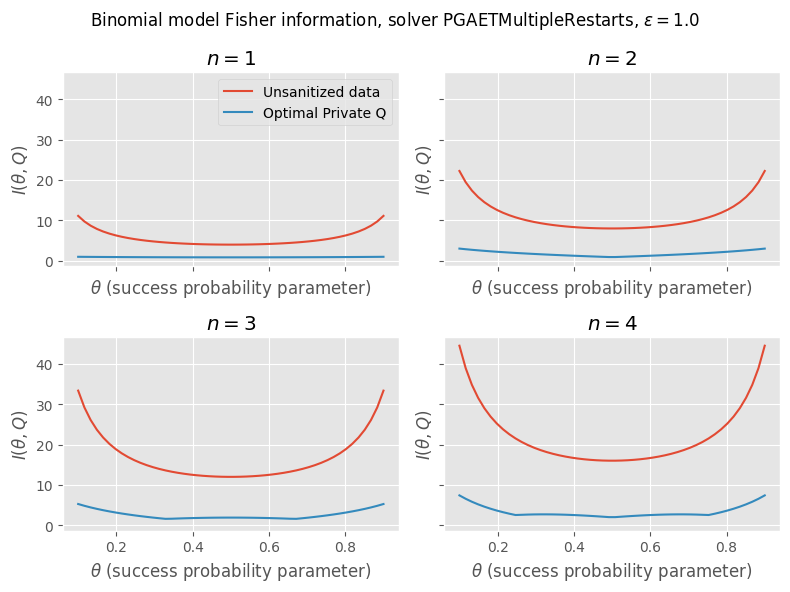

In [3]:
DP_tester.plot_fisher_infos(PGAETMultipleRestarts(), ns=[1, 2, 3, 4], epsilon=1.0)

100%|██████████| 50/50 [00:07<00:00,  6.84it/s]


[]


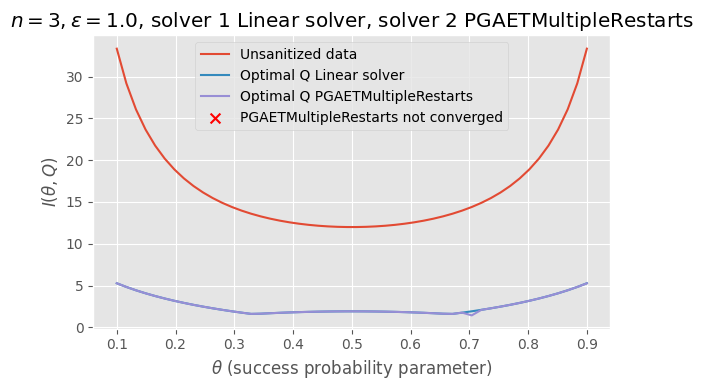

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(3), 3, 1.0)

  0%|          | 0/50 [00:00<?, ?it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [05:00<00:00,  6.01s/it]

[0.16530612 0.81836735]


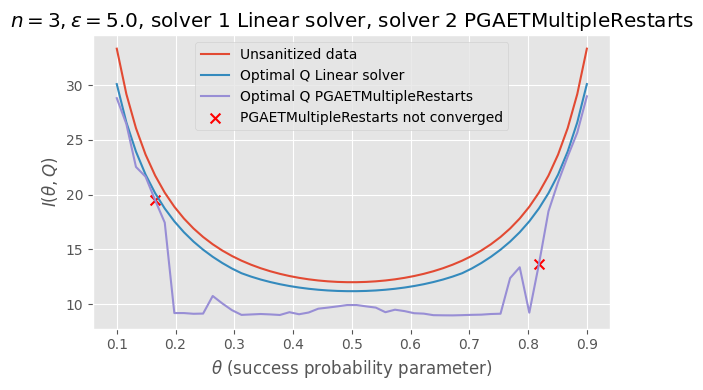

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 3, 5.0)

100%|██████████| 50/50 [00:54<00:00,  1.08s/it]

[]


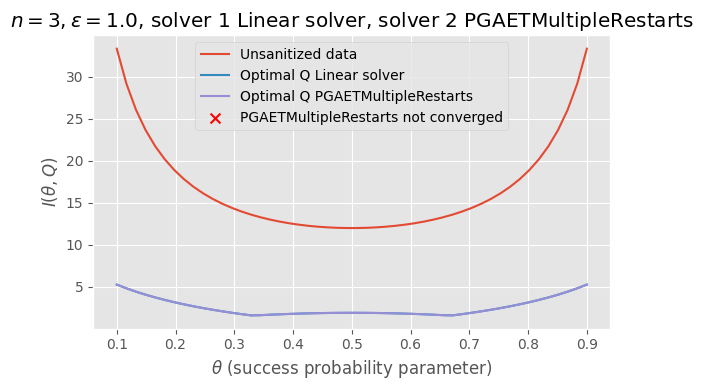

In [7]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 3, 1.0)

100%|██████████| 50/50 [15:54<00:00, 19.10s/it]

[]


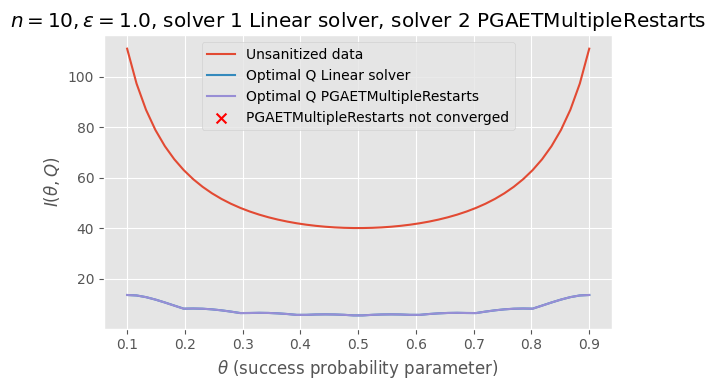

In [8]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAETMultipleRestarts(), 10, 1.0)

2it [5:41:54, 10257.37s/it]


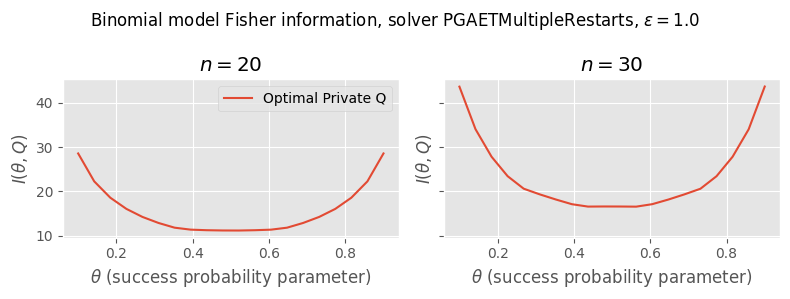

In [6]:
DP_tester.plot_fisher_infos(PGAETMultipleRestarts(), ns=[20, 30], epsilon=1.0, n_thetas=20, include_original=False)

2it [00:54, 30.07s/it]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
8it [1:29:33, 671.71s/it] 


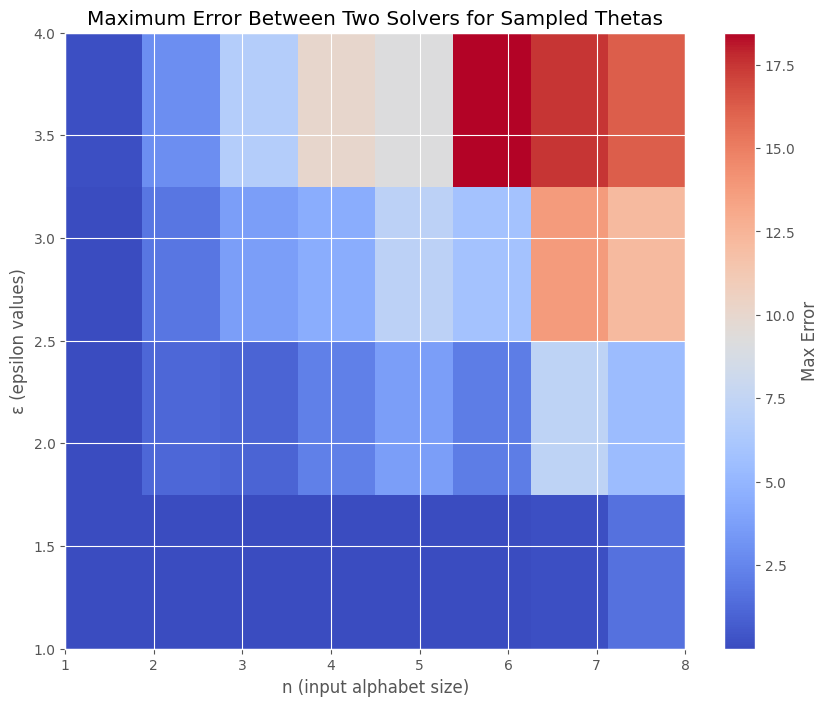

In [10]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGAETMultipleRestarts(n_restarts=5), 
    np.arange(8) + 1, 
    [1.0, 2.0, 3.0, 4.0], 
    sampled_thetas=20
)

In [4]:
import matplotlib.pyplot as plt

plt.contourf(results.T, cmap="coolwarm")
plt.colorbar()
plt.xlabel("n")
plt.ylabel("epsilon")
plt.title("Max error PGAET")
plt.tight_layout()
plt.show()

NameError: name 'results' is not defined

Calculating for PGAETMultipleRestarts


  0%|          | 0/50 [00:00<?, ?it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [01:54<00:00,  2.29s/it]


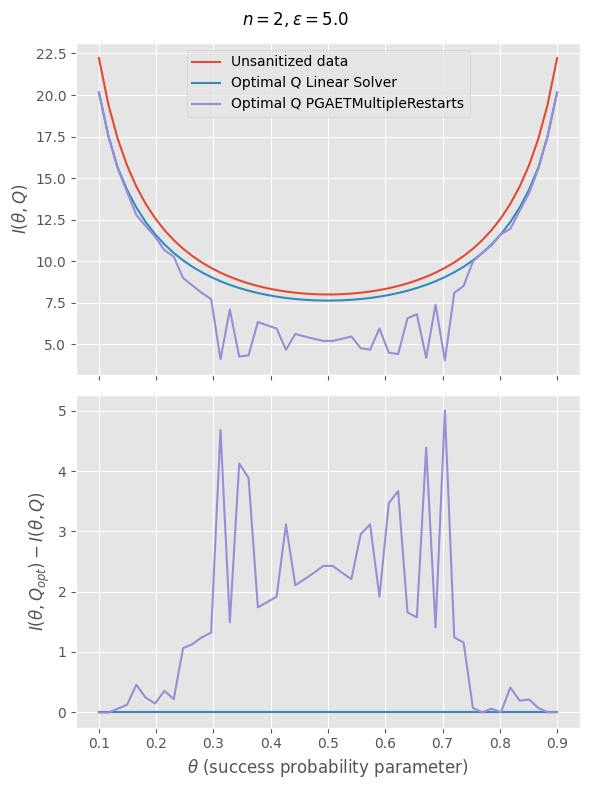

In [10]:
DP_tester.compare_fisher_multiple_solvers([PGAETMultipleRestarts(n_restarts=5)], 2, 5.0)

Calculating for Linear solver
Calculating for n=1
Calculating for n=2
Calculating for n=3
Calculating for n=4
Calculating for n=5
Calculating for n=6
Calculating for n=7
Calculating for n=8
Calculating for n=9
Calculating for n=10
Calculating for n=11
Calculating for n=12
Calculating for n=13
Calculating for n=14
Calculating for n=15
Calculating for PGAETMultipleRestarts
Calculating for n=1
Calculating for n=2
Calculating for n=3
Calculating for n=4
Calculating for n=5
Calculating for n=6
Calculating for n=7
Calculating for n=8
Calculating for n=9
Calculating for n=10
Calculating for n=11
Calculating for n=12
Calculating for n=13
Calculating for n=14
Calculating for n=15
Calculating for n=16
Calculating for n=17
Calculating for n=18
Calculating for n=19
Calculating for n=20
Calculating for n=21
Calculating for n=22
Calculating for n=23
Calculating for n=24
Calculating for n=25
Calculating for n=26
Calculating for n=27
Calculating for n=28
Calculating for n=29
Calculating for n=30


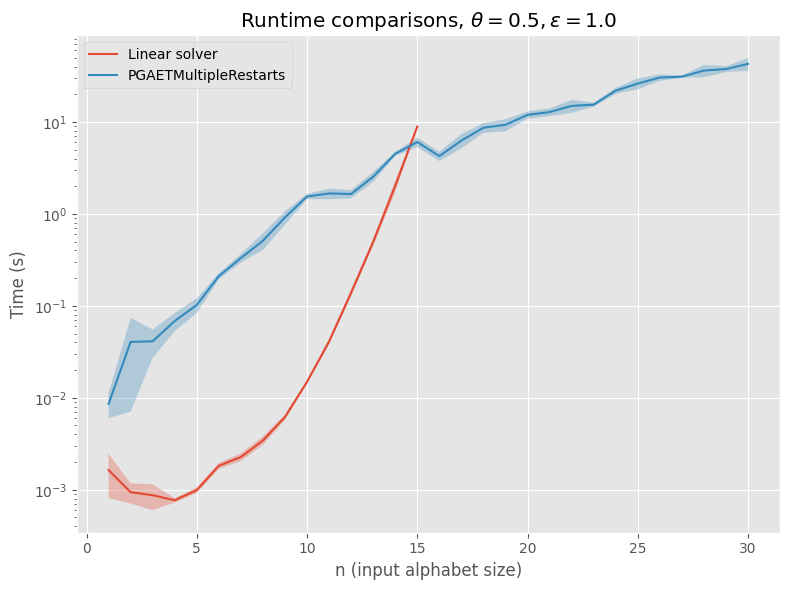

In [3]:
DP_tester.compare_runtimes([LinearSolver(), PGAETMultipleRestarts(n_restarts=1)], [15, 30], 0.5, 1.0, log=True, n_restarts=5)

Calculating for Linear solver
Calculating for n=1
Calculating for n=2
Calculating for n=3
Calculating for n=4
Calculating for n=5
Calculating for n=6
Calculating for n=7
Calculating for n=8
Calculating for n=9
Calculating for n=10
Calculating for n=11
Calculating for n=12
Calculating for n=13
Calculating for n=14
Calculating for n=15
Calculating for PGAETMultipleRestarts
Calculating for n=1
Calculating for n=2
Calculating for n=3
Calculating for n=4
Calculating for n=5
Calculating for n=6
Calculating for n=7
Calculating for n=8
Calculating for n=9
Calculating for n=10
Calculating for n=11
Calculating for n=12
Calculating for n=13
Calculating for n=14
Calculating for n=15
Calculating for n=16
Calculating for n=17
Calculating for n=18
Calculating for n=19
Calculating for n=20
Calculating for n=21
Calculating for n=22
Calculating for n=23
Calculating for n=24
Calculating for n=25
Calculating for n=26
Calculating for n=27
Calculating for n=28
Calculating for n=29
Calculating for n=30


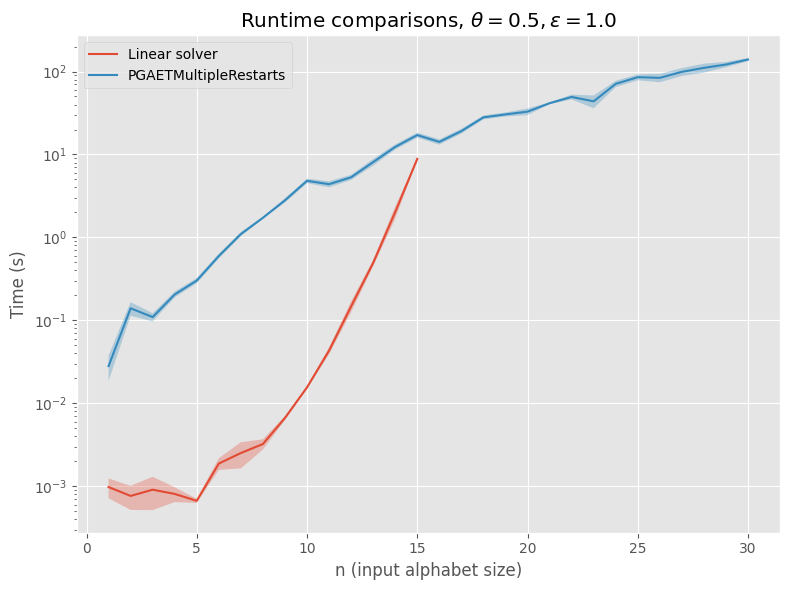

In [4]:
DP_tester.compare_runtimes([LinearSolver(), PGAETMultipleRestarts(n_restarts=3)], [15, 30], 0.5, 1.0, log=True, n_restarts=5)